In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('Processed2.xlsx')

# The data consists of 2 collumns 'Event name' that tells us about the event state 0 being normal driving condition and 1 being anomalous driving. Second collumn is the current acceleration value of the vehicle.(Ignore the collumn name)

In [17]:
df

,Event Name,Event Value (Upper limit =51km/h)
0,0,0.055039
1,0,0.050143
2,0,0.001398
3,0,0.060341
4,0,0.030905
5,0,0.012496
6,0,0.046744
7,0,0.003792
8,0,0.072815
9,0,0.017993


In [18]:
list(df)

['Event Name', 'Event Value (Upper limit =51km/h)']

In [19]:
df.columns = ['State', 'Acc']

# Binary classification considers time series data as discreet data. We generated 4 windows to overcome this which store the history of the last 4 states. 

In [20]:
for i in range(1, 5):
    df['Acc_{}'.format(i)] = df.Acc.shift(i)
    df['State_{}'.format(i)] = df.State.shift(i)
df = df.dropna()  

In [21]:
df

,State,Acc,Acc_1,State_1,Acc_2,State_2,Acc_3,State_3,Acc_4,State_4
4,0,0.030905,0.060341,0.0,0.001398,0.0,0.050143,0.0,0.055039,0.0
5,0,0.012496,0.030905,0.0,0.060341,0.0,0.001398,0.0,0.050143,0.0
6,0,0.046744,0.012496,0.0,0.030905,0.0,0.060341,0.0,0.001398,0.0
7,0,0.003792,0.046744,0.0,0.012496,0.0,0.030905,0.0,0.060341,0.0
8,0,0.072815,0.003792,0.0,0.046744,0.0,0.012496,0.0,0.030905,0.0
9,0,0.017993,0.072815,0.0,0.003792,0.0,0.046744,0.0,0.012496,0.0
10,0,0.026921,0.017993,0.0,0.072815,0.0,0.003792,0.0,0.046744,0.0
11,0,0.062040,0.026921,0.0,0.017993,0.0,0.072815,0.0,0.003792,0.0
12,0,0.044539,0.062040,0.0,0.026921,0.0,0.017993,0.0,0.072815,0.0
13,0,0.003710,0.044539,0.0,0.062040,0.0,0.026921,0.0,0.017993,0.0


# We now look at these 5 states and conclude the final state whether it's an anomally or not.

In [23]:
def Row_state(row):
    if row['State_1'] + row['State_2'] + row['State_3'] + row['State_4'] > 1:
        return 1
    else:
        return 0

In [31]:
for x in range(0,1):
    print(df.apply (lambda x: Row_state(x),axis=1))
    df['Target'] = df.apply (lambda row: Row_state(row),axis=1)

4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
        ..
49485    0
49486    0
49487    1
49488    1
49489    1
49490    0
49491    0
49492    0
49493    0
49494    0
49495    0
49496    0
49497    0
49498    0
49499    0
49500    0
49501    0
49502    1
49503    1
49504    0
49505    0
49506    0
49507    0
49508    0
49509    0
49510    0
49511    0
49512    0
49513    0
49514    0
Length: 49511, dtype: int64


/home/bahushruth/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
df

,State,Acc,Acc_1,State_1,Acc_2,State_2,Acc_3,State_3,Acc_4,State_4,Target
4,0,0.030905,0.060341,0.0,0.001398,0.0,0.050143,0.0,0.055039,0.0,0
5,0,0.012496,0.030905,0.0,0.060341,0.0,0.001398,0.0,0.050143,0.0,0
6,0,0.046744,0.012496,0.0,0.030905,0.0,0.060341,0.0,0.001398,0.0,0
7,0,0.003792,0.046744,0.0,0.012496,0.0,0.030905,0.0,0.060341,0.0,0
8,0,0.072815,0.003792,0.0,0.046744,0.0,0.012496,0.0,0.030905,0.0,0
9,0,0.017993,0.072815,0.0,0.003792,0.0,0.046744,0.0,0.012496,0.0,0
10,0,0.026921,0.017993,0.0,0.072815,0.0,0.003792,0.0,0.046744,0.0,0
11,0,0.062040,0.026921,0.0,0.017993,0.0,0.072815,0.0,0.003792,0.0,0
12,0,0.044539,0.062040,0.0,0.026921,0.0,0.017993,0.0,0.072815,0.0,0
13,0,0.003710,0.044539,0.0,0.062040,0.0,0.026921,0.0,0.017993,0.0,0


In [33]:
df.drop('State_1', axis=1, inplace=True)
df.drop('State', axis=1, inplace=True)
df.drop('State_2', axis=1, inplace=True)
df.drop('State_3', axis=1, inplace=True)
df.drop('State_4', axis=1, inplace=True)


/home/bahushruth/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
df

,Acc,Acc_1,Acc_2,Acc_3,Acc_4,Target
4,0.030905,0.060341,0.001398,0.050143,0.055039,0
5,0.012496,0.030905,0.060341,0.001398,0.050143,0
6,0.046744,0.012496,0.030905,0.060341,0.001398,0
7,0.003792,0.046744,0.012496,0.030905,0.060341,0
8,0.072815,0.003792,0.046744,0.012496,0.030905,0
9,0.017993,0.072815,0.003792,0.046744,0.012496,0
10,0.026921,0.017993,0.072815,0.003792,0.046744,0
11,0.062040,0.026921,0.017993,0.072815,0.003792,0
12,0.044539,0.062040,0.026921,0.017993,0.072815,0
13,0.003710,0.044539,0.062040,0.026921,0.017993,0


In [51]:
df['diff_1'] = np.abs(df.Acc - df.Acc_1)
df['diff_2'] = np.abs(df.Acc_1 - df.Acc_2)
df['diff_3'] = np.abs(df.Acc_2 - df.Acc_3)
df['diff_4'] = np.abs(df.Acc_3 - df.Acc_4)

/home/bahushruth/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/bahushruth/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/bahushruth/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


# We try to do a little more Exploratory data analysis and find out the change in acceleration is a good factor to determine anomallies.

In [52]:
df

,Acc,Acc_1,Acc_2,Acc_3,Acc_4,Target,diff_1,diff_2,diff_3,diff_4
4,0.030905,0.060341,0.001398,0.050143,0.055039,0,0.029436,0.058943,0.048745,0.004896
5,0.012496,0.030905,0.060341,0.001398,0.050143,0,0.018410,0.029436,0.058943,0.048745
6,0.046744,0.012496,0.030905,0.060341,0.001398,0,0.034248,0.018410,0.029436,0.058943
7,0.003792,0.046744,0.012496,0.030905,0.060341,0,0.042952,0.034248,0.018410,0.029436
8,0.072815,0.003792,0.046744,0.012496,0.030905,0,0.069023,0.042952,0.034248,0.018410
9,0.017993,0.072815,0.003792,0.046744,0.012496,0,0.054821,0.069023,0.042952,0.034248
10,0.026921,0.017993,0.072815,0.003792,0.046744,0,0.008927,0.054821,0.069023,0.042952
11,0.062040,0.026921,0.017993,0.072815,0.003792,0,0.035120,0.008927,0.054821,0.069023
12,0.044539,0.062040,0.026921,0.017993,0.072815,0,0.017502,0.035120,0.008927,0.054821
13,0.003710,0.044539,0.062040,0.026921,0.017993,0,0.040828,0.017502,0.035120,0.008927


In [82]:
def Estimate_out(row):
    if row['diff_1'] > 0.4 or row['diff_2'] > 0.4 or row['diff_3'] > 0.4 or row['diff_4'] > 0.4:
        return 1
    else:
        return 0

In [83]:
for x in range(0,1):
    print(df.apply (lambda x: Estimate_out(x),axis=1))
    df['Target'] = df.apply (lambda row: Estimate_out(row),axis=1)

4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
        ..
49485    0
49486    0
49487    0
49488    0
49489    0
49490    0
49491    0
49492    0
49493    0
49494    0
49495    0
49496    0
49497    0
49498    0
49499    0
49500    0
49501    0
49502    0
49503    0
49504    0
49505    0
49506    0
49507    0
49508    0
49509    0
49510    0
49511    0
49512    0
49513    0
49514    0
Length: 49511, dtype: int64


/home/bahushruth/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Now we can see the total number of anomalies in our data

In [84]:
df['Target'].value_counts()

0    46232
1     3279
Name: Target, dtype: int64

# Plotting a graph containing anomallies in driving pattern

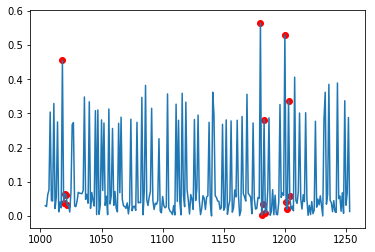

In [91]:
plot_df = df[1000:1250]
df_anomalies = plot_df[plot_df['Target']==1]
plt.plot(plot_df['Acc'])
plt.scatter(df_anomalies.index, df_anomalies.Acc, color='r')

# Graph without any anomalies 

(538.54999999999995, 658.45000000000005, 0.0, 0.7)

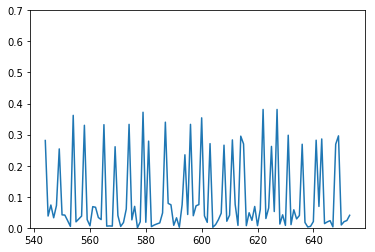

In [95]:
plot_df = df[540:650]
df_anomalies = plot_df[plot_df['Target']==1]
plt.plot(plot_df['Acc'])
plt.scatter(df_anomalies.index, df_anomalies.Acc, color='r')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.00,0.7))

In [93]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [94]:
writer = ExcelWriter('Processed3.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()